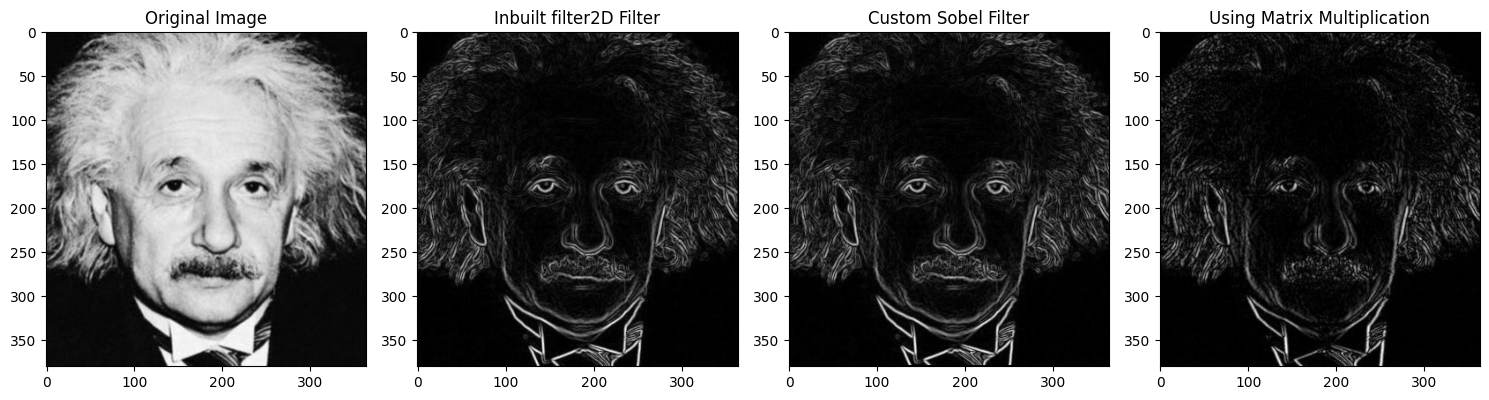

In [19]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#Using the Inbuilt Sobel Filter
img = cv.imread("einstein.png", cv.IMREAD_GRAYSCALE)
#Using the Inbuilt Sobel Filter
Xkernal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
Ykernal = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)
sobel_x = cv.filter2D(img, cv.CV_64F , Xkernal)
sobel_y = cv.filter2D(img, cv.CV_64F , Ykernal)
gradient_magnitude = np.sqrt(np.square(sobel_x) + np.square(sobel_y))
gradient_magnitude = (gradient_magnitude / gradient_magnitude.max() * 255).astype(np.uint8)


fig, ax = plt.subplots(1, 4, figsize=(15, 15))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(gradient_magnitude, cmap='gray')
ax[1].set_title('Inbuilt filter2D Filter')

#Using the Custom Sobel Filter
def sobel_filter(img):
    M,N = img.shape
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    filtered_image = np.zeros_like(img, dtype=np.float32)
    for i in range(1, M - 1):
        for j in range(1, N - 1):
            gx = np.sum(sobel_x * img[i - 1:i + 2, j - 1:j + 2])
            gy = np.sum(sobel_y * img[i - 1:i + 2, j - 1:j + 2])
            gradient_magnitude = np.sqrt(gx**2 + gy**2)
            filtered_image[i, j] = gradient_magnitude
    filtered_image = ((filtered_image - filtered_image.min()) / (filtered_image.max() - filtered_image.min()) * 255).astype(np.uint8)
    return filtered_image

# img = cv.imread("einstein.png", cv.IMREAD_GRAYSCALE)
filtered_image = sobel_filter(img)
ax[2].imshow(filtered_image, cmap='gray')
ax[2].set_title('Custom Sobel Filter')

#Using matrix multiplication
X1_kernal = np.array([[1,2,1]], dtype=np.float32)
X2_kernal = np.array([[1,0,-1]], dtype=np.float32)
sobel_x1 = cv.filter2D(img, cv.CV_64F , X1_kernal)
sobel_x = cv.filter2D(sobel_x1, cv.CV_64F , X2_kernal)
Y1_kernal = np.array([[1,0,-1]], dtype=np.float32)
Y2_kernal = np.array([[1,2,1]], dtype=np.float32)
sobel_y1 = cv.filter2D(img, cv.CV_64F , Y1_kernal)
sobel_y = cv.filter2D(sobel_y1, cv.CV_64F , Y2_kernal)
gradient_mag = np.sqrt(np.square(sobel_x) + np.square(sobel_y))
gradient_mag = (gradient_mag / gradient_mag.max() * 255).astype(np.uint8)


ax[3].imshow(gradient_mag, cmap='gray')
ax[3].set_title('Using Matrix Multiplication')

plt.tight_layout()
plt.show()